In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc
rc('text', usetex=False)
plt.rcParams.update({'font.size': 20})
import pandas as pd

In [ ]:
# in-the-wild SNR estimation

In [ ]:
# in-the-wild Continual learning

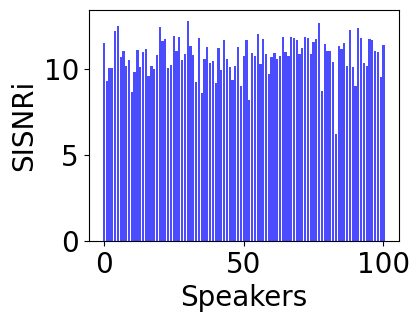

In [5]:
results_csv = '../tfgridnet_embed_train_results.csv'
results = pd.read_csv(results_csv)
x = results['split']; y = -results['val/sisnr_i']
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(range(len(x)), y, color='blue', alpha=0.7)
ax.set_xlabel('Speakers')
ax.set_ylabel('SISNRi')
plt.savefig('sisnri_speakers.pdf', bbox_inches='tight')


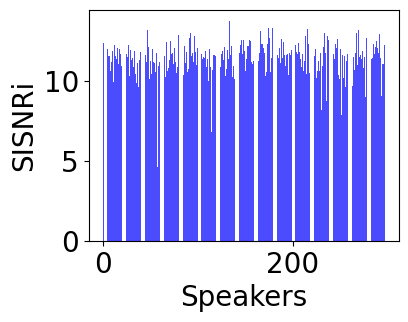

In [2]:
results_csv = '../EMSB_tfgridnet_embed_train_results.csv'
results = pd.read_csv(results_csv)
x = results['split']; y = -results['val/sisnr_i']
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(range(len(y)), y, color='blue', alpha=0.7)
ax.set_xlabel('Speakers')
ax.set_ylabel('SISNRi')
plt.savefig('sisnri_speakers_EMSB.pdf', bbox_inches='tight')


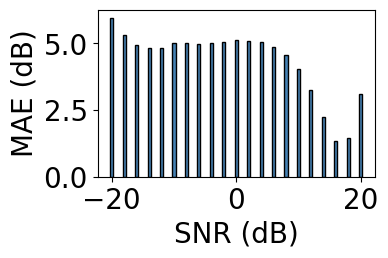

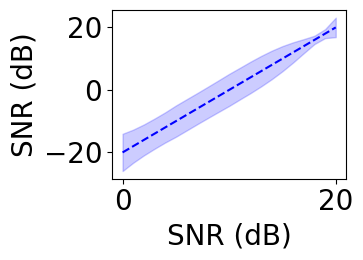

In [ ]:
csv_path = '../snr_estimations.csv'
df = pd.read_csv(csv_path)
snr = df['SNR'].values; mae = df['MAE'].values

fig = plt.figure(figsize=(4, 3))
# error = mae
plt.bar(snr, mae, color='steelblue', edgecolor='black', width=0.5)
plt.ylabel('MAE (dB)')
plt.xlabel('SNR (dB)')
plt.tight_layout()
plt.savefig('snr_estimations.pdf', bbox_inches='tight')

fig = plt.figure(figsize=(4, 3))
plt.plot(range(len(snr)), snr, color='blue', linestyle='--', label='Ideal')
snr_bottom = [s - m for s, m in zip(snr, mae)]
snr_top = [s + m for s, m in zip(snr, mae)]
plt.fill_between(range(len(snr)), snr_bottom, snr_top, color='blue', alpha=0.2, label='MAE')
plt.xlabel('SNR (dB)')
plt.ylabel('SNR (dB)')
plt.tight_layout()
plt.savefig('snr_estimations_fill.pdf', bbox_inches='tight')

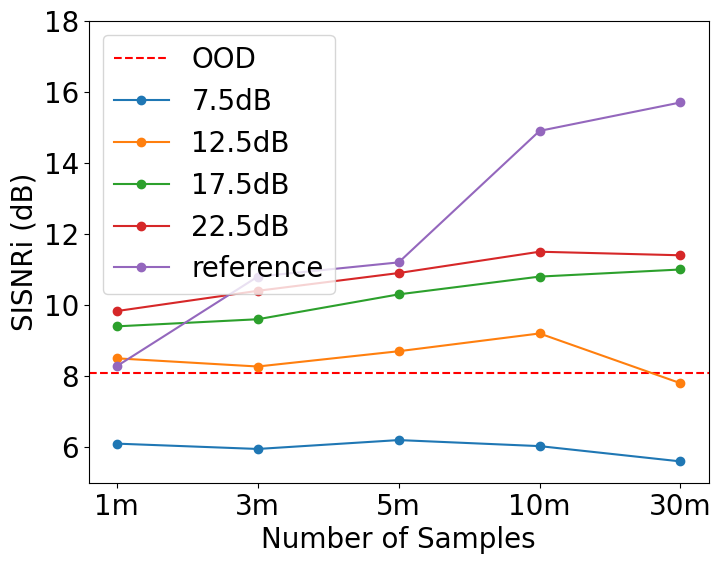

In [4]:
results = {'7.5dB': [6.1, 5.95, 6.2, 6.03, 5.6], '12.5dB':[8.5, 8.27, 8.7, 9.2, 7.8], '17.5dB': [9.4, 9.6, 10.3, 10.8, 11.0],
           '22.5dB': [9.83, 10.4, 10.9, 11.5, 11.4], 'reference': [8.28, 10.8, 11.2, 14.9, 15.7]}
OOD = 8.1, 
fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=OOD, color='red', linestyle='--', label='OOD')
num_samples = ['1m', '3m', '5m', '10m', '30m']
for i, (key, values) in enumerate(results.items()):
    ax.plot(num_samples, values, marker='o', linestyle='-', label=key)
ax.set_ylabel('SISNRi (dB)')
ax.set_xlabel('Number of Samples')
ax.set_ylim(5, 18)
plt.legend(loc='best')
plt.savefig(f'continual_learning.pdf', bbox_inches='tight')

<Figure size 400x300 with 0 Axes>

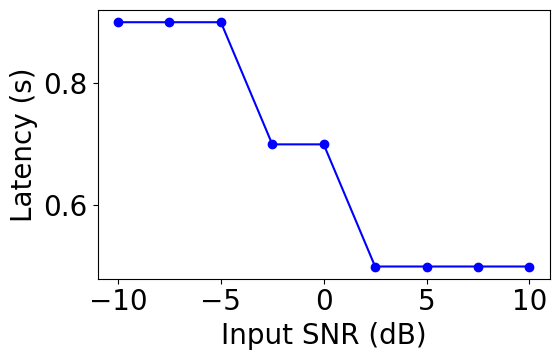

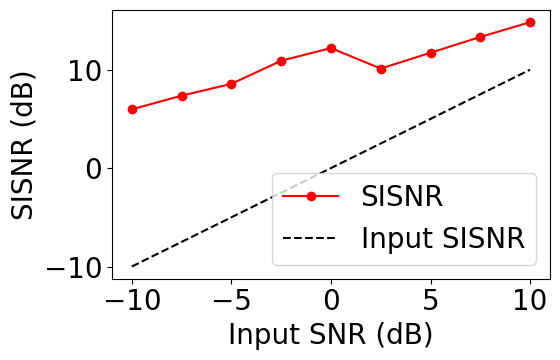

In [5]:
# adaptive evaluation
B = [1, 2, 3]
Latency = [0.5, 0.7, 0.9]
SISNRi = [8.4, 11.7, 12.8]
# performance for different SISNRi
B1_SNR = pd.read_csv('tfgridnet_embed_adaptive_1_snr.csv')
B2_SNR = pd.read_csv('tfgridnet_embed_adaptive_2_snr.csv')
B3_SNR = pd.read_csv('tfgridnet_embed_adaptive_3_snr.csv')
B4_SNR = pd.read_csv('tfgridnet_embed_adaptive_4_snr.csv')

snr_range = B1_SNR['split'].values
SISNR = [-B1_SNR['val/sisnr'].values, -B2_SNR['val/sisnr'].values, -B3_SNR['val/sisnr'].values, 
         -B4_SNR['val/sisnr'].values]

target_SISNR = 10
# snr_range = range(-10, 10, 1)
fig = plt.figure(figsize=(4, 3))
snr_latency = []; snr_performance = []
for i, snr in enumerate(snr_range):
    for (_SISNR, _latency) in zip(SISNR, Latency):
        snr_output = _SISNR[i]
        if snr_output >= target_SISNR:
            break
    snr_latency.append((snr, _latency))
    snr_performance.append((snr, _SISNR[i]))
fig = plt.figure(figsize=(6, 4))
plt.plot([x[0] for x in snr_latency], [x[1] for x in snr_latency], marker='o', color='blue', label='Latency')
plt.xlabel('Input SNR (dB)')
plt.ylabel('Latency (s)')
plt.tight_layout()
plt.savefig('adaptive_latency.pdf', bbox_inches='tight')

fig = plt.figure(figsize=(6, 4))
plt.plot([x[0] for x in snr_performance], [x[1] for x in snr_performance], marker='o', color='red', label='SISNR')
plt.plot([x[0] for x in snr_performance], [x[0] for x in snr_performance], linestyle='--', color='black', label='Input SISNR')
plt.xlabel('Input SNR (dB)')
plt.ylabel('SISNR (dB)')
plt.tight_layout()
plt.legend()
plt.savefig('adaptive_performance.pdf', bbox_inches='tight')